# Pooling Layer

## 一、为什么需要池化层？

### 卷积层有个问题：对位置太敏感

**回忆边缘检测的例子：**

```
输入：              卷积后：
1 1 0 0             0 1 0
1 1 0 0             0 1 0
1 1 0 0             0 1 0

边缘恰好在第2列和第3列之间 → 检测到了！（输出1）
```

**但如果图片稍微抖了一下，边缘移动了1个像素：**

```
输入变了：           卷积后：
1 0 0 0             1 0 0
1 0 0 0             1 0 0
1 0 0 0             1 0 0

1的位置变了！从第2列跑到第1列了
```

**问题：你手抖了一下，拍的照片偏了一点点，卷积的输出就完全变了！**

```
现实中：
    你拍照手会抖
    物体会移动
    光线会变化
    
    → 图片的像素位置总是有微小变化
    → 卷积输出就跟着剧烈变化
    → 这不好！
```

### 池化层的作用：让网络不那么"斤斤计较"

```
卷积层：边缘在第2列 → 输出1，移到第3列 → 输出变了！
加池化：边缘在第2列或第3列 → 输出都是1  ✓

池化让网络对"小幅移动"不敏感
```

---

## 二、池化层怎么工作？

### 和卷积一样：滑动窗口

```
但是！
    卷积：窗口内做加权求和（有卷积核）
    池化：窗口内直接取最大值（没有参数！）
```
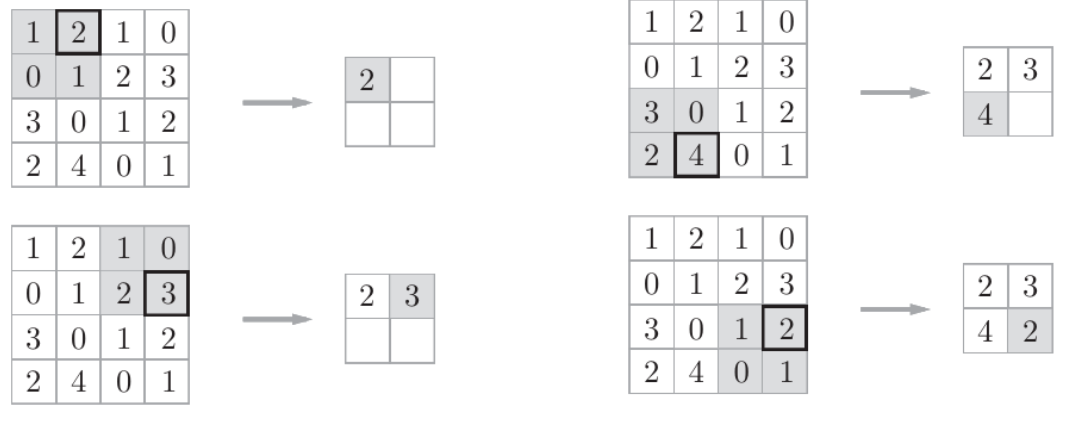

### 最大池化（Max Pooling）：取窗口内最大的

```
输入(4×4)：              2×2最大池化 → 输出(2×2)：

0  1  2  3
4  5  6  7       →       5   7
8  9  10 11              13  15
12 13 14 15
```

**怎么算的？**

```
左上角窗口：          右上角窗口：
[0, 1]               [2, 3]
[4, 5]               [6, 7]
最大值 = 5            最大值 = 7

左下角窗口：          右下角窗口：
[8,  9]              [10, 11]
[12, 13]             [14, 15]
最大值 = 13           最大值 = 15
```

**每个窗口取最大值，就这么简单！**

### 平均池化（Average Pooling）：取窗口内平均值

```
左上角窗口：[0, 1, 4, 5] → 平均 = 2.5
右上角窗口：[2, 3, 6, 7] → 平均 = 4.5
...
```

---

## 三、池化层为什么能解决位置敏感问题？

### 例子

```
情况1：边缘在第2列
卷积输出：[0, 1, 0]

情况2：边缘移动了1像素
卷积输出：[1, 0, 0]

如果不加池化：两种情况输出完全不同 ✗

加了2×2最大池化：
    情况1：[0, 1, 0] → max(0,1) = 1  ✓
    情况2：[1, 0, 0] → max(1,0) = 1  ✓
    
两种情况输出一样！
```

---

## 四、池化层 vs 卷积层

| | 卷积层 | 池化层 |
|:---|:---|:---|
| **窗口操作** | 加权求和（有卷积核） | 取最大值或平均值 |
| **有参数吗** | 有！卷积核要学习 | **没有！没有任何参数** |
| **通道变化** | 输入通道→输出通道（可以变） | **输入=输出（不变！）** |
| **有padding和stride吗** | 有 | 有，用法一样 |
| **作用** | 提取特征 | 缓解位置敏感 |

---

## 五、代码怎么用？

### 最大池化

```python
nn.MaxPool2d(kernel_size=2)
# 2×2的窗口，取最大值
# 默认stride=kernel_size=2，所以输出自动减半

nn.MaxPool2d(kernel_size=2, stride=2)
# 和上面一样，stride默认就等于kernel_size
```

### 平均池化

```python
nn.AvgPool2d(kernel_size=2)
# 2×2的窗口，取平均值
```

### 放到网络里

```python
net = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, padding=1),   # 卷积
    nn.ReLU(),                                      # 激活
    nn.MaxPool2d(kernel_size=2),     # 池化：大小减半
    
    nn.Conv2d(16, 32, kernel_size=3, padding=1),   # 卷积
    nn.ReLU(),                                      # 激活
    nn.MaxPool2d(kernel_size=2),    # 池化：大小再减半
)
```

### 大小怎么变？

```
输入：1×28×28

Conv2d(1,16,3,padding=1) → 16×28×28   通道变了，大小没变
ReLU                     → 16×28×28   不变
MaxPool2d(2)             → 16×14×14   大小减半！通道不变！

Conv2d(16,32,3,padding=1)→ 32×14×14   通道变了，大小没变
ReLU                     → 32×14×14   不变
MaxPool2d(2)             → 32×7×7     大小再减半！通道不变！
```

**规律：**

```
卷积(padding=1)：改通道数，不改大小
池化(kernel=2)：不改通道数，大小减半
```

---

## 六、常见模式

### 经典三件套（几乎所有CNN）

```python
# 卷积 → 激活 → 池化（重复多次）

nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1),   # 卷积
nn.ReLU(),                                              # 激活
nn.MaxPool2d(kernel_size=2),                            # 池化
```

**每重复一次：**

```
通道数变多（卷积干的）
图片大小减半（池化干的）

3×224×224  → 16×112×112 → 32×56×56 → 64×28×28 → ...
通道越来越多，图片越来越小
```

---

## 七、最大池化 vs 平均池化

```
最大池化（更常用）：
    保留最强的信号
    "这个区域内最突出的特征是什么"
    适合检测"有没有"某个特征

平均池化（有时用）：
    取平均值，更平滑
    "这个区域的整体水平怎样"
    常用在网络最后一层

实际中：
    中间层 → 基本都用MaxPool2d
    最后一层 → 有时用AvgPool2d
```

---

## 八、总结

### 需要记住的

```
1. 池化层的作用：让网络对小的位置变化不敏感
2. 最大池化：取窗口内最大值
3. 没有参数！不需要学习
4. 输入通道 = 输出通道（通道数不变）
5. 默认让图片大小减半
```

### 代码

```python
# 最常用：2×2最大池化
nn.MaxPool2d(kernel_size=2)

# 经典三件套
nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1),
nn.ReLU(),
nn.MaxPool2d(kernel_size=2),
```

**池化 = 在小区域内取最大值
作用 = 让网络不怕图片轻微移动
效果 = 图片大小减半，通道数不变，没有参数**
